In [22]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib import patches

print("Libraries imported successfully!")

Libraries imported successfully!


In [23]:
# Define grid size
GRID_SIZE = (10, 10)  # 10x10 grid

# Set start and goal positions
START = (0, 0)
GOAL = (9, 9)

# Obstacles placed at some coordinates
OBSTACLES = [
    (3, 3), (3, 4), (4, 4),
    (5, 5), (6, 5), (6, 6)
]

# Possible actions
ACTIONS = ['up', 'down', 'left', 'right']
ACTION_IDX = {a: i for i, a in enumerate(ACTIONS)}

print("Environment initialized!")

Environment initialized!


In [24]:
# Environment Setup with Dynamic Obstacles
import random

GRID_SIZE = (10, 10)
START = (0, 0)
GOAL = (9, 9)

# Static obstacles
OBSTACLES = [
    (1, 1), (1, 2), (2, 1),
    (3, 3), (3, 4), (4, 3),
    (6, 6), (6, 5), (5, 6)
]

# Dynamic obstacle positions (initially placed)
DYNAMIC_OBSTACLES = [(4, 4), (5, 5)]

# Function to update dynamic obstacles randomly
def update_dynamic_obstacles():
    global DYNAMIC_OBSTACLES
    new_positions = []
    while len(new_positions) < len(DYNAMIC_OBSTACLES):
        x = random.randint(0, GRID_SIZE[0] - 1)
        y = random.randint(0, GRID_SIZE[1] - 1)
        pos = (x, y)
        if pos not in OBSTACLES and pos != START and pos != GOAL and pos not in new_positions:
           new_positions.append(pos)
    DYNAMIC_OBSTACLES = new_positions

In [25]:
def is_valid(pos):
    x, y = pos
    return (0 <= x < GRID_SIZE[0] and 0 <= y < GRID_SIZE[1] and pos not in OBSTACLES)

# Updated get_next_pos to consider dynamic obstacles
def get_next_pos(pos, action):
    x, y = pos
    if action == 'up' and y < GRID_SIZE[1] - 1:
        y += 1
    elif action == 'down' and y > 0:
        y -= 1
    elif action == 'right' and x < GRID_SIZE[0] - 1:
        x += 1
    elif action == 'left' and x > 0:
        x -= 1
    # If next position is a static or dynamic obstacle, stay in place
    if (x, y) not in OBSTACLES and (x, y) not in DYNAMIC_OBSTACLES:
        return (x, y)
    else:
        return pos

print("Movement logic ready.")

Movement logic ready.


In [26]:
# Training the Q-learning agent with dynamic obstacles and logging

# Initialize Q-table with zeros
Q_table = np.zeros((GRID_SIZE[0], GRID_SIZE[1], len(ACTIONS)))

# Hyperparameters
episodes = 500
max_steps = 100
epsilon = 1.0
epsilon_decay = 0.995
min_epsilon = 0.01
learning_rate = 0.1
discount_factor = 0.9

# Logging metrics for dashboard
episode_rewards = []
episode_steps = []
episode_success = []

for episode in range(episodes):
    state = START
    steps = 0
    total_reward = 0
    update_dynamic_obstacles()  # Refresh obstacles at episode start

    while state != GOAL and steps < max_steps:
        # Epsilon-greedy action selection
        if random.uniform(0, 1) < epsilon:
            action = random.choice(ACTIONS)
        else:
            action = ACTIONS[np.argmax(Q_table[state[0], state[1]])]

        next_state = get_next_pos(state, action)

        # Reward system
        if next_state == GOAL:
            reward = 10
        elif next_state == state:
            reward = -5  # hit wall or obstacle
        else:
            reward = -0.1  # slight penalty to encourage shortest path

        total_reward += reward  # Log total reward

        # Q-value update
        old_value = Q_table[state[0], state[1], ACTION_IDX[action]]
        next_max = np.max(Q_table[next_state[0], next_state[1]])
        new_value = old_value + learning_rate * (reward + discount_factor * next_max - old_value)
        Q_table[state[0], state[1], ACTION_IDX[action]] = new_value

        state = next_state
        steps += 1

        # Move dynamic obstacles every 5 steps
        if steps % 5 == 0:
            update_dynamic_obstacles()

    # Decay epsilon
    if epsilon > min_epsilon:
        epsilon *= epsilon_decay

    # Logging for dashboard
    episode_rewards.append(total_reward)
    episode_steps.append(steps)
    episode_success.append(1 if state == GOAL else 0)


In [27]:
def simulate_path():
    path = [START]
    state = START
    for _ in range(100):
        action = ACTIONS[np.argmax(Q_table[state[0], state[1]])]
        state = get_next_pos(state, action)
        path.append(state)
        if state == GOAL:
            break
    return path

# Get the path after training
path = simulate_path()
print("Path simulation complete!")

Path simulation complete!


In [28]:
# Drawing the environment including dynamic obstacles
def draw_env(agent_pos, path=[]):
    fig, ax = plt.subplots()
    ax.set_xlim(0, GRID_SIZE[0])
    ax.set_ylim(0, GRID_SIZE[1])
    ax.set_xticks(np.arange(0, GRID_SIZE[0]+1, 1))
    ax.set_yticks(np.arange(0, GRID_SIZE[1]+1, 1))
    ax.grid(True)

    # Draw static obstacles
    for (x, y) in OBSTACLES:
        ax.add_patch(patches.Rectangle((x, y), 1, 1, color='black'))

    # Draw dynamic obstacles
    for (x, y) in DYNAMIC_OBSTACLES:
        ax.add_patch(patches.Rectangle((x, y), 1, 1, color='orange'))

    # Draw start and goal
    ax.add_patch(patches.Rectangle(START, 1, 1, color='green'))
    ax.add_patch(patches.Rectangle(GOAL, 1, 1, color='red'))

    # Draw path
    for (x, y) in path:
        ax.add_patch(patches.Circle((x+0.5, y+0.5), 0.2, color='blue'))

    # Draw current agent position
    ax.add_patch(patches.Circle((agent_pos[0]+0.5, agent_pos[1]+0.5), 0.3, color='yellow'))

    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

Final Path Taken by the Agent:
[(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (4, 1), (5, 1), (6, 1), (6, 2), (6, 3), (6, 4), (5, 4), (4, 4), (4, 5), (4, 6), (4, 7), (3, 7), (3, 8), (4, 8), (5, 8), (6, 8), (7, 8), (7, 9), (8, 9), (9, 9)]

Total steps taken: 24


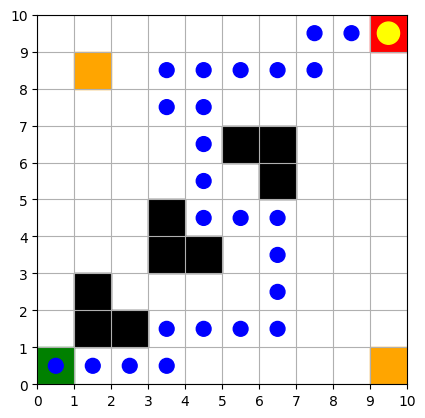

In [29]:
# Display the final path and performance
print("Final Path Taken by the Agent:")
print(path)

print(f"\nTotal steps taken: {len(path) - 1}")

# Optional: Visualize the final path
draw_env(agent_pos=path[-1], path=path)


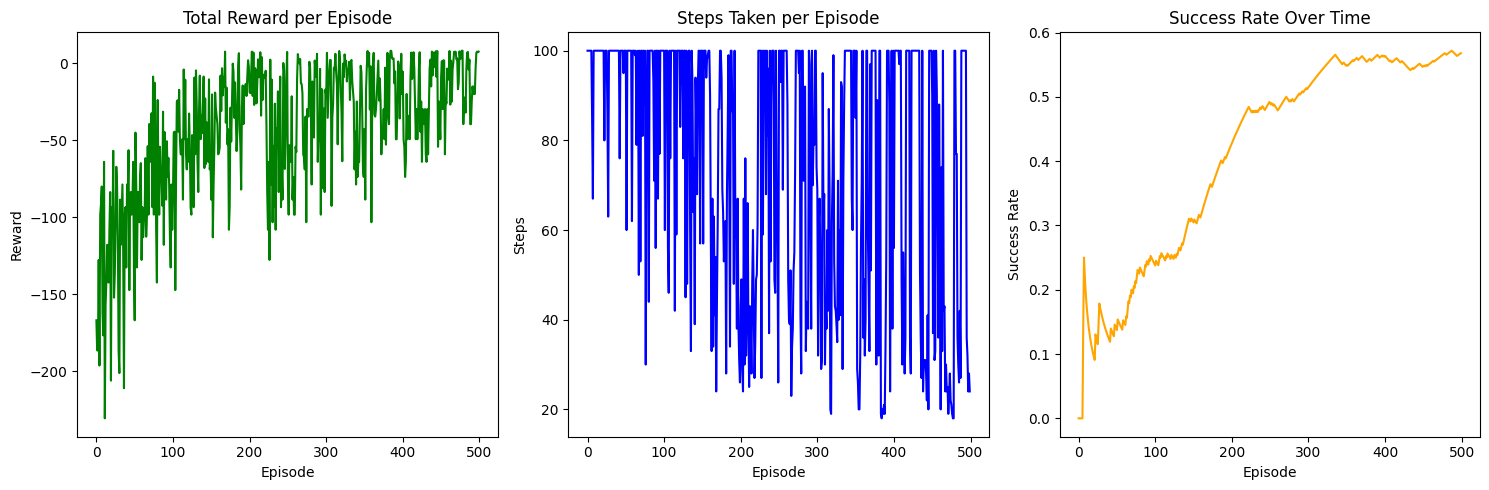

In [30]:
# Dashboard - Visualize Training Metrics
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 5))

# Total reward
plt.subplot(1, 3, 1)
plt.plot(episode_rewards, color='green')
plt.title("Total Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")

# Steps taken
plt.subplot(1, 3, 2)
plt.plot(episode_steps, color='blue')
plt.title("Steps Taken per Episode")
plt.xlabel("Episode")
plt.ylabel("Steps")

# Success rate
plt.subplot(1, 3, 3)
success_rate = np.cumsum(episode_success) / (np.arange(len(episode_success)) + 1)
plt.plot(success_rate, color='orange')
plt.title("Success Rate Over Time")
plt.xlabel("Episode")
plt.ylabel("Success Rate")

plt.tight_layout()
plt.show()
